In [1]:
import os

import scipy.stats as ss
from dotenv import load_dotenv
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import category_encoders as ce
import pickle


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # nice visualisations
import matplotlib.pyplot as plt # basic visualisation library
import datetime as dt # library to opearate on dates

from DataProcessing.extract_ICMs import gen_ICM_list
from DataProcessing.split_train_validation_leave_timestamp_out import split_train_validation_multiple_intervals, \
    split_train_validation_multiple_intervals_Explicit_By_Repeat_Purchase
from Data_cleaning.customers_cleaning import *
from Data_manager.DatasetMapperManager import DatasetMapperManager
from Data_manager.HMDatasetReader import HMDatasetReader

print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))


from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

pandas version: 1.2.4
numpy version: 1.20.1
seaborn version: 0.11.2


In [2]:
dataset_dict={"articles":"articles.csv","customers":"customers.csv","transactions":"transactions_train.csv"}


path = '../dataset'

df_articles=pd.read_csv(os.path.join(path,dataset_dict["articles"]))
df_customers=pd.read_csv(os.path.join(path,dataset_dict["customers"]))
df_transactions=pd.read_csv(os.path.join(path,dataset_dict["transactions"]))

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [122]:
manager = DatasetMapperManager()
timestamp_list_train = [("2019-06-22", "2019-09-23")]
timestamp_list_validation = [("2019-09-23", "2019-09-30")]

split_train_validation_multiple_intervals_Explicit_By_Repeat_Purchase(manager,df_transactions,timestamp_list_train,timestamp_list_validation)

Traceback (most recent call last):
  File "/Applications/PyCharm.app/Contents/plugins/python/helpers/pydev/_pydevd_bundle/pydevd_comm.py", line 292, in _on_run
    r = self.sock.recv(1024)
ConnectionResetError: [Errno 54] Connection reset by peer


Preprocessing dataframe...
ERROR! Session/line number was not unique in database. History logging moved to new session 336
Processing interval 1...
Processing interval 1...
                                                     UserID     ItemID  Data  \
12325430  0000d6c053fc8f9389d4565051f12402d5774aa4a9d2e5...  758064002   1.0   
12325431  0000d6c053fc8f9389d4565051f12402d5774aa4a9d2e5...  566140001   1.0   
12325432  000172a9c322560c849754ffbdfdb2180d408aa7176b94...  670942008   1.0   
12325433  000172a9c322560c849754ffbdfdb2180d408aa7176b94...  380609037   1.0   
12325434  000172a9c322560c849754ffbdfdb2180d408aa7176b94...  554811021   1.0   

              t_dat  
12325430 2019-06-22  
12325431 2019-06-22  
12325432 2019-06-22  
12325433 2019-06-22  
12325434 2019-06-22  
                                                     UserID     ItemID  Data  \
16889895  ffe8f09992a6e188390e34872208dd23ebb6425957cc64...  772829002   1.0   
16889896  fff88e9edfb6987b82fad36c1270082bc101be633efd


KeyboardInterrupt



In [121]:
manager.URM_DICT

{'URM_train':                                                      UserID     ItemID  Data
 12325430  0000d6c053fc8f9389d4565051f12402d5774aa4a9d2e5...  758064002   1.0
 12325431  0000d6c053fc8f9389d4565051f12402d5774aa4a9d2e5...  566140001   1.0
 12325432  000172a9c322560c849754ffbdfdb2180d408aa7176b94...  670942008   1.0
 12325433  000172a9c322560c849754ffbdfdb2180d408aa7176b94...  380609037   1.0
 12325434  000172a9c322560c849754ffbdfdb2180d408aa7176b94...  554811021   1.0
 ...                                                     ...        ...   ...
 16889895  ffe8f09992a6e188390e34872208dd23ebb6425957cc64...  772829002   1.0
 16889896  fff88e9edfb6987b82fad36c1270082bc101be633efd0a...  817869001   1.0
 16889897  fff88e9edfb6987b82fad36c1270082bc101be633efd0a...  652730010   1.0
 16889898  fffbe76d05cba1b9bdf14bf67e58e7b73d4c2e3418f13c...  715624036   1.0
 16889899  fffbe76d05cba1b9bdf14bf67e58e7b73d4c2e3418f13c...  456163051   1.0
 
 [3971423 rows x 3 columns],
 'URM_validation':  

In [93]:
timestamp_df = df_transactions.copy()
timestamp_column = 't_dat'

timestamp_df[timestamp_column] = pd.to_datetime(timestamp_df[timestamp_column], format='%Y-%m-%d')

In [94]:
timestamp_df.rename(columns={"customer_id": "UserID", "article_id": "ItemID"}, inplace=True)
timestamp_df['ItemID'] = timestamp_df['ItemID'].astype(str)
# timestamp_df['Data'] = 1.0


In [95]:
timestamp_df = timestamp_df.drop_duplicates()


In [96]:
timestamp_df

,t_dat,UserID,ItemID,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


In [97]:
timestamp_df = timestamp_df[[timestamp_column, 'UserID', 'ItemID']]

timestamp_df_with_timestamp = timestamp_df.copy()

timestamp_df = timestamp_df.groupby(['UserID', 'ItemID']).size().reset_index(name='Data')



In [101]:
timestamp_df['Data'] = timestamp_df['Data'].apply(lambda x: 20 if x >= 20 else x)


In [99]:
timestamp_df['new'].value_counts()


1     25967821
2      1208890
3       105606
4        16708
5         4359
6         1524
7          682
8          308
9          195
10         130
11          69
12          42
13          36
14          16
15          14
20          14
16          11
18           7
19           5
17           2
Name: new, dtype: int64

In [102]:
timestamp_df['Data'].value_counts()



1     25967821
2      1208890
3       105606
4        16708
5         4359
6         1524
7          682
8          308
9          195
10         130
11          69
12          42
13          36
14          16
15          14
20          14
16          11
18           7
19           5
17           2
Name: Data, dtype: int64

In [109]:
max = timestamp_df['new'].max()
timestamp_df['New'] = timestamp_df['new'].apply(lambda x: x/max)


In [115]:



timestamp_df[timestamp_df['Data'] > 18]

,UserID,ItemID,Data,new,New
1188237,0b19646eedcc9544fac9ab9dc12a5b4efc923913316f4a...,847180001,20,20,1.00
4930502,2e0d3c6971620e348c3ca50868af6289333d382bf9f24a...,156231001,20,20,1.00
5469460,330c9c34b6d79e31802be102e360a57c0ae61b15e79128...,228257004,19,19,0.95
6686329,3eb3636e346ba6487cb0e86dc0bd5ff0ea1d231bab17df...,228257001,20,20,1.00
7478464,462f48e30609f8e2fd13f1dc577a437f5233252bae40e6...,156231001,20,20,1.00
8448192,4f503f96f0585292eb2535c89cf7392007e70f62968460...,120129001,20,20,1.00
9592768,59ed41a78b9cd5ae4d4afa5632dbeb8deb7c412385d1c2...,156231001,19,19,0.95
12209178,725e94ded9d679b79c5719052dce66098171b9c202f17d...,228257001,20,20,1.00
15071537,8d2c33a1b060ce16add06f3742447115e5aaea20e847c1...,668537001,20,20,1.00
15582085,91f1cc035b5d3e7f54f7c765bb82754129db9eadab0cd5...,399223001,19,19,0.95


In [81]:
timestamp_df = pd.merge(left=timestamp_df_with_timestamp,right=timestamp_df,how='left',on=['UserID','ItemID'])


In [82]:
timestamp_df

,t_dat,UserID,ItemID,Data
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,1
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,1
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,1
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,1
...,...,...,...,...
28813414,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,1
28813415,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,3
28813416,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,1
28813417,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,1


AttributeError: 'int' object has no attribute 'max'

In [83]:
timestamp_df['Data'].value_counts()


1     25967821
2      2417780
3       316818
4        66832
5        21795
6         9144
7         4774
8         2464
9         1755
10        1300
11         759
12         504
13         468
14         224
15         210
16         176
18         126
19          95
24          72
22          66
23          46
20          40
37          37
17          34
30          30
28          28
21          21
Name: Data, dtype: int64

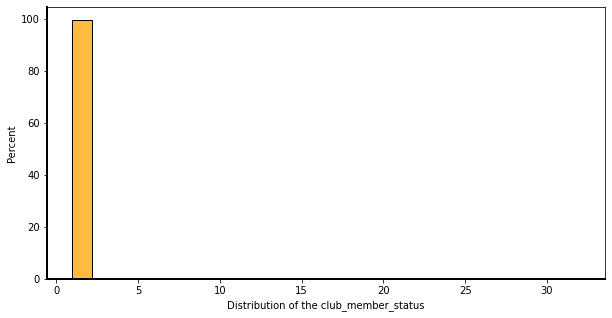

In [25]:
timestamp_df.rename(columns={"customer_id": "UserID", "article_id": "ItemID"}, inplace=True)
timestamp_df['ItemID'] = timestamp_df['ItemID'].astype(str)
# timestamp_df['Data'] = 1.0

timestamp_df = timestamp_df[[timestamp_column, 'UserID', 'ItemID']]

In [26]:
timestamp_df.drop(timestamp_column, inplace=True, axis=1)

In [27]:
timestamp_df

,UserID,ItemID
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004
...,...,...
31788319,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001
31788320,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004
31788321,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001
31788322,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002


In [48]:
df_transactions.head(10)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
5,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687001,0.016932,2
6,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221001,0.020322,2
7,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,688873012,0.030492,1
8,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,501323011,0.053373,1
9,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,598859003,0.045746,2


In [4]:
df_transactions.nunique()

t_dat                   734
customer_id         1362281
article_id           104547
price                  9857
sales_channel_id          2
dtype: int64

In [14]:
df_transactions.groupby(['customer_id','article_id'])


t_dat  price  \
customer_id                                        article_id                 
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d... 176209023       1      1   
                                                   568601006       2      2   
                                                   568601043       1      1   
                                                   607642008       1      1   
                                                   625548001       1      1   
...                                                              ...    ...   
ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38b... 821395003       1      1   
                                                   840360003       1      1   
                                                   866755002       2      2   
                                                   882810001       1      1   
ffffd9ac14e89946416d80e791d064701994755c3ab686a... 806050001       1      1   

                                                               sales_channel_id  
customer_id                                        article_id                    
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d... 176209023                  1  
                                                   568601006                  2  
                                                   568601043                  1  
                                                   607642008                  1  
                                                   625548001                  1  
...                                                                         ...  
ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38b... 821395003                  1  
                                                   840360003                  1  
                                                   866755002                  2  
                                                   882810001                  1  
ffffd9ac14e89946416d80e791d064701994755c3ab686a... 806050001                  1  

[27306439 rows x 3 columns]

In [ ]:
df_transactions.customer_id.nunique()

In [3]:
df_transactions

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


In [4]:
df_customers.nunique()


customer_id               1371980
FN                              1
Active                          1
club_member_status              3
fashion_news_frequency          4
age                            84
postal_code                352899
dtype: int64

In [ ]:
df_transactions.groupby('price').size().reset_index(name='counts')


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(df_transactions.groupby('price').size().reset_index(name='counts')
)

In [ ]:
kmeans

In [7]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [8]:
kmeans.cluster_centers_

array([[9.81745412e-02, 1.38481438e+03],
       [2.71016949e-02, 2.01674133e+06]])

In [19]:
kmeans = KMeans(n_clusters=2, random_state=0).fit_predict()

In [34]:
df_transactions.groupby(['price']).size().reset_index(name='counts')

,price,counts
0,0.000017,1
1,0.000034,3
2,0.000051,2
3,0.000102,3
4,0.000119,4
...,...,...
9852,0.503288,2
9853,0.503508,1
9854,0.506780,144
9855,0.532373,1


In [24]:
df_transactions.groupby(['price']).size().sort_values(ascending=False).reset_index(name='counts')

,price,counts
0,0.016932,3416921
1,0.033881,3406538
2,0.025407,3266926
3,0.013542,1497769
4,0.050831,1494130
...,...,...
9852,0.071441,1
9853,0.108932,1
9854,0.108983,1
9855,0.109000,1


In [45]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=df_transactions.groupby(['price']).size().sort_values(ascending=False).reset_index(name='counts'), x='price',kde=True)
ax.set_xlabel('Distribution of the price')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
plt.show()


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fd73d0bfca0> (for post_execute):



KeyboardInterrupt



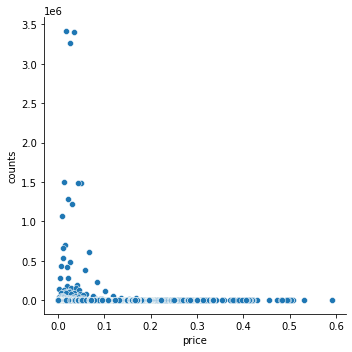

In [32]:
ax = sns.relplot(data=df_transactions.groupby(['price']).size().sort_values(ascending=False).reset_index(name='counts'), x='price', y="counts")
plt.show()

UndefinedVariableError: name 'period' is not defined

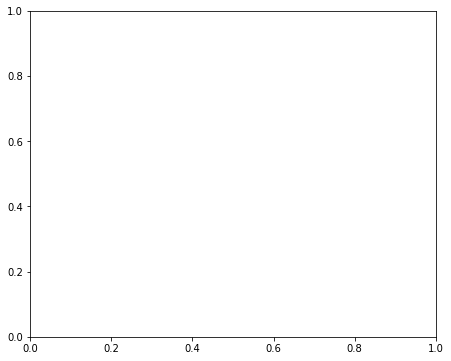

In [51]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.histplot(x="earliest", hue="index_group_name", multiple="stack", data=df_articles.query("period != 0"))
plt.subplot(1, 2, 2)
sns.histplot(x="latest", hue="index_group_name", multiple="stack", data=df_articles.query("period != 0"))


In [60]:
df_transactions

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


In [69]:
df_transactions['2020-09-16' <= df_transactions['t_dat']].size / df_transactions.size


0.007559725388479116

In [78]:
df_transactions[('2019-09-23' <= df_transactions['t_dat']) & (df_transactions['t_dat'] <= '2019-09-29')].size / df_transactions.size

0.013320110868380478

In [79]:
df_transactions[('2018-09-23' <= df_transactions['t_dat']) & (df_transactions['t_dat'] <= '2018-09-29')].size / df_transactions.size


0.013940841926740145

In [3]:
df_transactions


,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


In [25]:
df_transactions[('2019-09-23' <= df_transactions['t_dat']) & (df_transactions['t_dat'] < '2019-09-30')].drop(columns='t_dat').drop(columns='price').drop(columns='sales_channel_id').drop_duplicates()

,customer_id,article_id
16889901,0008804a45e7fbc8653ba8f5ce15880cb966ca220c52d2...,743722002
16889902,0008804a45e7fbc8653ba8f5ce15880cb966ca220c52d2...,768503001
16889903,0008804a45e7fbc8653ba8f5ce15880cb966ca220c52d2...,753061003
16889904,0008804a45e7fbc8653ba8f5ce15880cb966ca220c52d2...,748140001
16889906,0008804a45e7fbc8653ba8f5ce15880cb966ca220c52d2...,730135004
...,...,...
17313318,ffeeb69582892b79205ec19f7ac0d9633a04369a4357f9...,762856001
17313319,ffeeb69582892b79205ec19f7ac0d9633a04369a4357f9...,652956002
17313320,ffeeb69582892b79205ec19f7ac0d9633a04369a4357f9...,372860001
17313321,ffeeb69582892b79205ec19f7ac0d9633a04369a4357f9...,695632001


In [26]:
manager = DatasetMapperManager()
timestamp_list_train = [("2019-06-22", "2019-09-23")]
timestamp_list_validation = [("2019-09-23", "2019-09-30")]

split_train_validation_multiple_intervals_Explicit_By_Repeat_Purchase(manager,df_transactions,timestamp_list_train,timestamp_list_validation)
# split_train_validation_multiple_intervals(manager,df_transactions,timestamp_list_train,timestamp_list_validation)

Preprocessing dataframe...
Processing interval 1...
Processing interval 1...
                                                     UserID     ItemID  Data  \
12325430  0000d6c053fc8f9389d4565051f12402d5774aa4a9d2e5...  758064002   1.0   
12325431  0000d6c053fc8f9389d4565051f12402d5774aa4a9d2e5...  566140001   1.0   
12325432  000172a9c322560c849754ffbdfdb2180d408aa7176b94...  670942008   1.0   
12325433  000172a9c322560c849754ffbdfdb2180d408aa7176b94...  380609037   1.0   
12325434  000172a9c322560c849754ffbdfdb2180d408aa7176b94...  554811021   1.0   

              t_dat  
12325430 2019-06-22  
12325431 2019-06-22  
12325432 2019-06-22  
12325433 2019-06-22  
12325434 2019-06-22  
                                                     UserID     ItemID  Data  \
16889901  0008804a45e7fbc8653ba8f5ce15880cb966ca220c52d2...  743722002   1.0   
16889902  0008804a45e7fbc8653ba8f5ce15880cb966ca220c52d2...  768503001   1.0   
16889903  0008804a45e7fbc8653ba8f5ce15880cb966ca220c52d2...  753061003

In [27]:
manager.URM_DICT

{'URM_train':                                                      UserID     ItemID  Data
 12325430  0000d6c053fc8f9389d4565051f12402d5774aa4a9d2e5...  758064002   1.0
 12325431  0000d6c053fc8f9389d4565051f12402d5774aa4a9d2e5...  566140001   1.0
 12325432  000172a9c322560c849754ffbdfdb2180d408aa7176b94...  670942008   1.0
 12325433  000172a9c322560c849754ffbdfdb2180d408aa7176b94...  380609037   1.0
 12325434  000172a9c322560c849754ffbdfdb2180d408aa7176b94...  554811021   1.0
 ...                                                     ...        ...   ...
 16889895  ffe8f09992a6e188390e34872208dd23ebb6425957cc64...  772829002   1.0
 16889896  fff88e9edfb6987b82fad36c1270082bc101be633efd0a...  817869001   1.0
 16889897  fff88e9edfb6987b82fad36c1270082bc101be633efd0a...  652730010   1.0
 16889898  fffbe76d05cba1b9bdf14bf67e58e7b73d4c2e3418f13c...  715624036   1.0
 16889899  fffbe76d05cba1b9bdf14bf67e58e7b73d4c2e3418f13c...  456163051   1.0
 
 [3971423 rows x 3 columns],
 'URM_validation':  

In [9]:
manager.URM_DICT.get('URM_train')


,UserID,ItemID,Data
12325430,0000d6c053fc8f9389d4565051f12402d5774aa4a9d2e5...,758064002,1.0
12325431,0000d6c053fc8f9389d4565051f12402d5774aa4a9d2e5...,566140001,1.0
12325432,000172a9c322560c849754ffbdfdb2180d408aa7176b94...,670942008,1.0
12325433,000172a9c322560c849754ffbdfdb2180d408aa7176b94...,380609037,1.0
12325434,000172a9c322560c849754ffbdfdb2180d408aa7176b94...,554811021,1.0
...,...,...,...
16855945,ffb8b05931ec151d65371d36d350032b106cf89d3fbaa9...,823941001,1.0
16855946,ffbb36b9565695cea67d8cd4d670340096f087b0035406...,752002001,1.0
16855947,ffbb36b9565695cea67d8cd4d670340096f087b0035406...,733027010,1.0
16855948,ffbb36b9565695cea67d8cd4d670340096f087b0035406...,801076003,1.0


In [10]:
manager.URM_DICT.get('URM_validation')

,UserID,ItemID,Data
16889901,0008804a45e7fbc8653ba8f5ce15880cb966ca220c52d2...,743722002,1.0
16889902,0008804a45e7fbc8653ba8f5ce15880cb966ca220c52d2...,768503001,1.0
16889903,0008804a45e7fbc8653ba8f5ce15880cb966ca220c52d2...,753061003,1.0
16889904,0008804a45e7fbc8653ba8f5ce15880cb966ca220c52d2...,748140001,1.0
16889906,0008804a45e7fbc8653ba8f5ce15880cb966ca220c52d2...,730135004,1.0
...,...,...,...
17273272,fffd70b14382482cf3d10def86df367b2b6e0af711dede...,693243019,1.0
17273275,fffd70b14382482cf3d10def86df367b2b6e0af711dede...,674606045,1.0
17273278,fffd70b14382482cf3d10def86df367b2b6e0af711dede...,775996010,1.0
17273279,fffec3dbcc87c78300f37f62cfca4274f1ea6ef59dba10...,796240001,1.0


In [32]:
manager = DatasetMapperManager()
gen_ICM_list(manager, df_articles)

Creating ICM for column product_type_name
Creating ICM for column product_type_no
Creating ICM for column product_group_name
Creating ICM for column graphical_appearance_name
Creating ICM for column colour_group_name


In [35]:
manager.ICM_DICT


{'ICM_product_type_name':            ItemID  FeatureID  Data
 0       108775015   Vest top   1.0
 1       108775044   Vest top   1.0
 2       108775051   Vest top   1.0
 3       110065001        Bra   1.0
 4       110065002        Bra   1.0
 ...           ...        ...   ...
 105537  953450001      Socks   1.0
 105538  953763001   Vest top   1.0
 105539  956217002      Dress   1.0
 105540  957375001  Hair clip   1.0
 105541  959461001      Dress   1.0
 
 [105542 rows x 3 columns],
 'ICM_product_type_no':            ItemID FeatureID  Data
 0       108775015       253   1.0
 1       108775044       253   1.0
 2       108775051       253   1.0
 3       110065001       306   1.0
 4       110065002       306   1.0
 ...           ...       ...   ...
 105537  953450001       302   1.0
 105538  953763001       253   1.0
 105539  956217002       265   1.0
 105540  957375001        72   1.0
 105541  959461001       265   1.0
 
 [105542 rows x 3 columns],
 'ICM_product_group_name':            It

In [43]:
manager.ICM_DICT.get("ICM_product_type_name")['FeatureID'].nunique()

131

In [56]:
df_articles.nunique()

article_id                      105542
product_code                     47224
prod_name                        45875
product_type_no                    132
product_type_name                  131
product_group_name                  19
graphical_appearance_no             30
graphical_appearance_name           30
colour_group_code                   50
colour_group_name                   50
perceived_colour_value_id            8
perceived_colour_value_name          8
perceived_colour_master_id          20
perceived_colour_master_name        20
department_no                      299
department_name                    250
index_code                          10
index_name                          10
index_group_no                       5
index_group_name                     5
section_no                          57
section_name                        56
garment_group_no                    21
garment_group_name                  21
detail_desc                      43404
dtype: int64

In [55]:
for colum in df_articles.columns:
    print(colum)


article_id
product_code
prod_name
product_type_no
product_type_name
product_group_name
graphical_appearance_no
graphical_appearance_name
colour_group_code
colour_group_name
perceived_colour_value_id
perceived_colour_value_name
perceived_colour_master_id
perceived_colour_master_name
department_no
department_name
index_code
index_name
index_group_no
index_group_name
section_no
section_name
garment_group_no
garment_group_name
detail_desc


In [2]:
dataset_dict={"articles":"processed_articles.csv","customers":"processed_customers.csv","transactions":"processed_transactions_train.csv"}

path = '../dataset'

df_articles_processed=pd.read_csv(os.path.join(path,dataset_dict["articles"]))
df_customers_processed=pd.read_csv(os.path.join(path,dataset_dict["customers"]))
df_transactions_processed=pd.read_csv(os.path.join(path,dataset_dict["transactions"]))


In [60]:
df_articles_processed.columns


Index(['Unnamed: 0', 'article_id', 'product_code', 'product_type_no',
       'graphical_appearance_no', 'colour_group_code',
       'perceived_colour_value_id', 'perceived_colour_master_id',
       'department_no', 'index_code', 'index_group_no', 'section_no',
       'garment_group_no', 'cleaned_prod_name', 'cleaned_product_type_name',
       'cleaned_product_group_name', 'cleaned_graphical_appearance_name',
       'cleaned_colour_group_name', 'cleaned_perceived_colour_value_name',
       'cleaned_perceived_colour_master_name', 'cleaned_department_name',
       'cleaned_index_name', 'cleaned_index_group_name',
       'cleaned_section_name', 'cleaned_garment_group_name',
       'cleaned_detail_desc', 'out_of_stock', 'on_discount',
       'sale_periods_months', 'transaction_peak_year_month'],
      dtype='object')

In [62]:
df_articles_processed.nunique()


Unnamed: 0                              105542
article_id                              105542
product_code                             47224
product_type_no                            132
graphical_appearance_no                     30
colour_group_code                           50
perceived_colour_value_id                    8
perceived_colour_master_id                  20
department_no                              299
index_code                                  10
index_group_no                               5
section_no                                  57
garment_group_no                            21
cleaned_prod_name                        42819
cleaned_product_type_name                  128
cleaned_product_group_name                  19
cleaned_graphical_appearance_name           29
cleaned_colour_group_name                   40
cleaned_perceived_colour_value_name          8
cleaned_perceived_colour_master_name        20
cleaned_department_name                    239
cleaned_index

In [1]:
dataset_name = "hm"
reader = HMDatasetReader()

load_dotenv()
PROCESSED_PATH = os.getenv('PROCESSED_PATH')

print('{}/{}/'.format(PROCESSED_PATH, dataset_name))
dataset = reader.load_data('{}/{}/'.format(PROCESSED_PATH, dataset_name))

NameError: name 'HMDatasetReader' is not defined

In [ ]:
dataset.get_loaded_ICM_dict().items()
